![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

Load and inspect the Netflix data

In [11]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the provided csv & print the first 5 rows
netflix_df = pd.read_csv("netflix_data.csv")
print(netflix_df.head())

  show_id  ...             genre
0      s1  ...  International TV
1      s2  ...            Dramas
2      s3  ...     Horror Movies
3      s4  ...            Action
4      s5  ...            Dramas

[5 rows x 11 columns]



**Subset and Clean the DataFrame for "Movies"**


In [12]:
# checking for TV SHOW distinct data in the 'type' column
print(netflix_df.value_counts('type'))

# Subset & Filter the data to remove TV SHOWS 
netflix_subset = netflix_df[netflix_df['type'] == 'Movie']
print(netflix_subset.value_counts('type'))

type
Movie      5377
TV Show    2410
dtype: int64
type
Movie    5377
dtype: int64


**keeping only the columns "title", "country", "genre", "release_year", "duration", and saving this into a new DataFrame called netflix_movies**

In [13]:
new_columns=['title','country','genre','release_year','duration']
netflix_movies = netflix_subset[new_columns]
print(netflix_movies.columns)

Index(['title', 'country', 'genre', 'release_year', 'duration'], dtype='object')


**Filter the DataFrame by Movie duration**

In [14]:
# Filter netflix_movies to see movies that have a duration fewer than 60 minutes,
# save as short_movies and print the first 20 rows to inspect the data.

short_movies = netflix_movies[netflix_movies['duration'] < 60]
print(short_movies.head(20))

                                                 title  ... duration
35                                           #Rucker50  ...       56
55                 100 Things to do Before High School  ...       44
67   13TH: A Conversation with Oprah Winfrey & Ava ...  ...       37
101                                  3 Seconds Divorce  ...       53
146                                     A 3 Minute Hug  ...       28
162  A Christmas Special: Miraculous: Tales of Lady...  ...       22
171                         A Family Reunion Christmas  ...       29
177                    A Go! Go! Cory Carson Christmas  ...       22
178                    A Go! Go! Cory Carson Halloween  ...       22
179                  A Go! Go! Cory Carson Summer Camp  ...       21
181             A Grand Night In: The Story of Aardman  ...       59
200                            A Love Song for Latasha  ...       20
220                         A Russell Peters Christmas  ...       44
233                              A

**Assign colors to movie genres**

In [15]:
colors = []
for index, row in netflix_movies.iterrows():
    genre = row['genre']
    if genre == "Documentaries":
        colors.append("Blue")
    elif genre == "Uncategorized":
        colors.append("Red")
    elif genre == "Children":
        colors.append("Green")
    elif genre == "Stand-Up":
        colors.append("Black")
    elif genre == "Dramas":
        colors.append("Purple")
    else:
        colors.append("Red")  # Default color for other genres

**Plot the movie duration by year using the genre colors created**

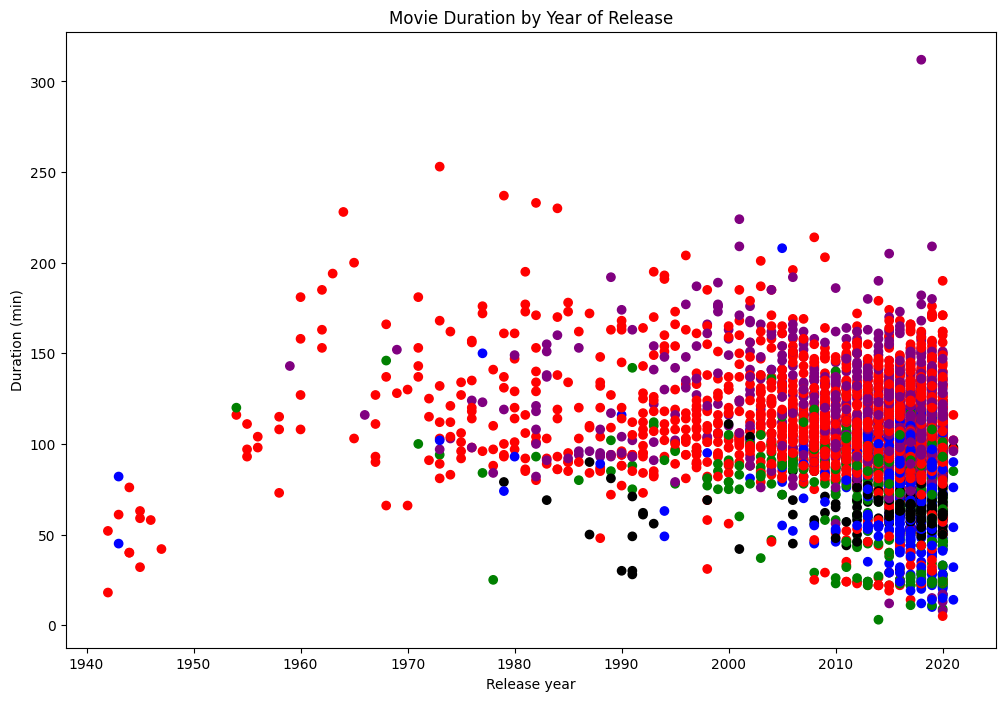

In [16]:
# intialize & customize the figure
fig = plt.figure(figsize = (12,8))
plt.scatter(netflix_movies.release_year, netflix_movies.duration, color=colors)

# Create a title and axis labels
plt.title("Movie Duration by Year of Release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.show()

# Are we certain that movies are getting shorter?
answer = "no"